<a href="https://colab.research.google.com/github/Shivanigoud244/MachineLearning/blob/master/CNN_CIFAR10_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


In [30]:
import torchvision

In [31]:
trainset = torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=torchvision.transforms.ToTensor())

Files already downloaded and verified


In [32]:
#class_labels
classes = ('airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck')

In [33]:
type(trainset)

torchvision.datasets.cifar.CIFAR10

In [34]:
# loading the dataset --> dataloader class ( torch.utils.data.dataloader)

trainloader = torch.utils.data.DataLoader(trainset)

In [35]:
data_iter = iter(trainloader)
type(data_iter)

torch.utils.data.dataloader._SingleProcessDataLoaderIter

In [36]:
# Access the data --> next() method

images,labels = data_iter.next()
print(images.shape)

torch.Size([1, 3, 32, 32])


1 - Batch size

3 - channels in input( RGB - color)

32,32 - each pixels /shapes of indivdual image

In [37]:
print(labels.item())

6


In [38]:
classes[labels.item()]

'frog'

In [39]:
# Specifying batch_size, shuffle & load data in paralell using multiprocessing workes

trainloader = torch.utils.data.DataLoader(trainset,batch_size = 4, shuffle = True)
data_iter = iter(trainloader)
images,labels=data_iter.next()

In [40]:
print(images.shape)

torch.Size([4, 3, 32, 32])


4 - Batch Size( no of images loaded)
3 = Channels input
32,32 - size of individualimage

In [41]:
labels

tensor([6, 6, 8, 9])

# Visualize the Data


In [42]:
image_data = images[0]
image_data.shape

torch.Size([3, 32, 32])

In [43]:
# onvert to numpy, image data is req as 32,32,3 as number of channels in image will in last index, torch doesn't have in built so converting it into numpay

np_image = image_data.numpy()
np_image.shape

(3, 32, 32)

In [44]:
np_image = np.transpose(np_image,(1,2,0))

In [45]:
np_image.shape

(32, 32, 3)

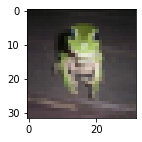

In [46]:
# plotting the image

plt.figure(figsize = (2,2))
plt.imshow(np_image)
plt.show()

In [47]:
print(classes[labels[0].item()])

frog


In [48]:
def image_show(image_data):
  np_image = image_data.numpy()
  np_image = np.transpose(np_image,(1,2,0))
  plt.figure(figsize=(2,3))
  plt.imshow(np_image)
  plt.show()

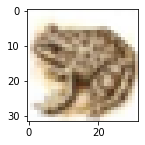

In [49]:
image_show(images[1])

In [50]:
print(classes[labels[1].item()])

frog


# First Convolution Layer

In [53]:
class FirstCNN(nn.Module):
  def __init__(self):
    super(FirstCNN,self).__init__()
    self.conv1 = nn.Conv2d(3,10,3) # ( n0 of input channels,no of output channels, kernel size )
    # kernel size --> 3 = (3,3)

  def forward(self,x):
    y =self.conv1(x)
    return y

In [54]:
cnn = FirstCNN()

In [55]:
out = cnn(images)

In [56]:
print(out.shape)

torch.Size([4, 10, 30, 30])


4 : number of images(batch siez)

10: channels in output

30 , 30 --> piels image size

Default

Padding = (0,0) , stride = (1,1)

In [58]:
sample = out[0,0,:,:]
sample.shape

torch.Size([30, 30])

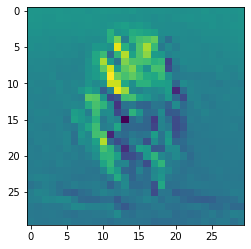

In [60]:
plt.imshow(sample.detach().numpy())
plt.show()

In [62]:
class FirstCNN(nn.Module):
  def __init__(self):
    super(FirstCNN,self).__init__()
    self.conv1 = nn.Conv2d(3,10,3,padding = (1,1),stride = (1,1)) # ( n0 of input channels,no of output channels, kernel size )
    # kernel size --> 3 = (3,3)

  def forward(self,x):
    y =self.conv1(x)
    return y

In [63]:
cnn = FirstCNN()

out = cnn(images)

print(out.shape)

torch.Size([4, 10, 32, 32])


# Deep Convolution network


In [64]:
class DeepCNN(nn.Module):
  def __init__(self):
    super(DeepCNN,self).__init__()
    self.model=nn.Sequential(nn.Conv2d(3,10,3,padding=(1,1),stride=(1,1)),nn.Conv2d(10,5,3,padding=(1,1),stride=(1,1)))

  def forward(self,x):
    y=self.model(x)
    return y

In [65]:
deep = DeepCNN()
out = deep(images)
print(out.shape)

torch.Size([4, 5, 32, 32])


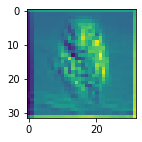

In [66]:
sample = out[0,1,:,:]
plt.figure(figsize=(2,2))
plt.imshow(sample.detach().numpy())
plt.show()


In [67]:
# pooling
#Mean pool or AVg pool and Max pool


class avg_pool(nn.Module):
  def __init__(self):
    super(avg_pool,self).__init__()
    self.model=nn.Sequential(nn.Conv2d(3,10,3,padding=(1,1),stride=(1,1)),nn.Conv2d(10,5,3,padding=(1,1),
                                                                                    stride=(1,1)),nn.AvgPool2d(2, stride = 2))# kernel size, stride

  def forward(self,x):
    y=self.model(x)
    return y

In [70]:
abgpool = avg_pool()
out = abgpool(images)
print(out.shape)

torch.Size([4, 5, 16, 16])


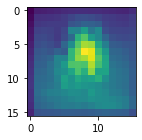

In [71]:
sample = out[0,1,:,:]
plt.figure(figsize=(2,2))
plt.imshow(sample.detach().numpy())
plt.show()


In [73]:
# pooling
#Mean pool or AVg pool and Max pool


class max_pool(nn.Module):
  def __init__(self):
    super(max_pool,self).__init__()
    self.model=nn.Sequential(nn.Conv2d(3,10,3,padding=(1,1),stride=(1,1)),nn.Conv2d(10,5,3,padding=(1,1),
                                                                                    stride=(1,1)),nn.AvgPool2d(2, stride = 2))# kernel size, stride

  def forward(self,x):
    y=self.model(x)
    return y

In [74]:
maxpool = max_pool()
out = abgpool(images)
print(out.shape)

torch.Size([4, 5, 16, 16])


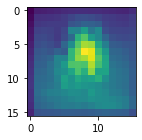

In [75]:
sample = out[0,1,:,:]
plt.figure(figsize=(2,2))
plt.imshow(sample.detach().numpy())
plt.show()
